In [2]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
def getAttributeDeep(mat, attribute, value):
    return np.squeeze(mat[attribute][0, 0][value])

def getAttributeShallow(mat, attribute):
    return np.squeeze(mat[attribute])

#### Processed Data
Lat_acc = Lat gforce

In [5]:
ae = sio.loadmat('CAL_DATA/10_13_2018_Autocross1_processed.mat')
raw = sio.loadmat('CAL_DATA/10_13_2018_Autocross1')

In [9]:
time = getAttributeShallow(ae, 'time')
lat_acc = getAttributeShallow(ae, 'lat_accel')
# lat_acc = getAttributeDeep(raw, 'G_Force_Lat', 'Value')
engine_rpm = getAttributeShallow(ae, 'engine_rpm')
ws_FL, ws_FR = getAttributeShallow(ae, 'wheelspeed_FL'), \
    getAttributeShallow(ae, 'wheelspeed_FR')
steering_ang = getAttributeShallow(ae, 'steer_angle')

# from raw
throttle_pos = getAttributeDeep(raw, 'Throttle_Pos', 'Value')
time_raw = getAttributeDeep(raw, 'Throttle_Pos', 'Time')

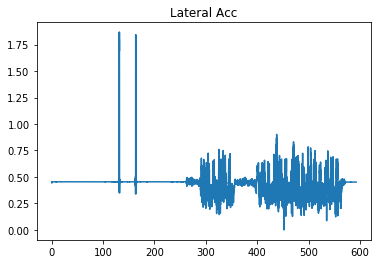

In [10]:
copy = lat_acc[:10000]
minV,maxV = np.min(copy), np.max(copy)
lat_acc -= minV
lat_acc /= (maxV - -minV)


plt.title('Lateral Acc')
# plt.ylim(top=2, bottom=-2)
plt.plot(time, lat_acc)
plt.show()

# plt.title('Steering Ang')
# plt.plot(time, steering_ang)
# plt.ylim(top=25, bottom=-25)
# plt.show())

Brake Pos: $[0, 1]$ \
1: full activation 0: no activation

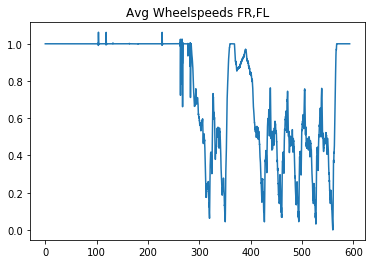

In [11]:
avg_ws = (ws_FL + ws_FR)/2
avg_ws /= (np.max(avg_ws))
avg_ws = 1-avg_ws

plt.title('Avg Wheelspeeds FR,FL')
plt.plot(time, avg_ws)
plt.show()

Throttle Pos: $[0, 1]$ \
0: disengagement, 1: engagement

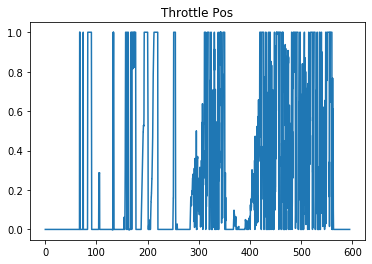

In [12]:
throttle_pos /= 40 

plt.title('Throttle Pos')
plt.plot(time_raw, throttle_pos)
plt.show()